In [53]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [46]:
df = pd.read_csv('train.csv', names=['filename'])
df

,filename
0,train/
1,train/train
2,train/train/35
3,train/train/35/295746bc5ba46358362ccc0fc897c27...
4,train/train/35/6421b56dff49cca37be44d677d481c1...
...,...
105438,train/train/39/7c611ca72cd28cbc0c45503e6dc62d0...
105439,train/train/39/42657696d1cbdd6f8b38b086cd7179c...
105440,train/train/39/9b5565fffee030373b51aace766dd65...
105441,train/train/39/602f13fd1456877abe7f785de6b60be...


In [48]:
df = df[df['filename'].str.endswith('jpg')] # remove tmp files
df

,filename
3,train/train/35/295746bc5ba46358362ccc0fc897c27...
4,train/train/35/6421b56dff49cca37be44d677d481c1...
5,train/train/35/b5cc9741e8aa6b5f8aef01e1f21e628...
6,train/train/35/4cd077f70971a2de86fc33b79c0a669...
7,train/train/35/0852b0221623c41df9c7452019e4444...
...,...
105437,train/train/39/66297ed4092972a4ce8fd287c2aa215...
105438,train/train/39/7c611ca72cd28cbc0c45503e6dc62d0...
105439,train/train/39/42657696d1cbdd6f8b38b086cd7179c...
105440,train/train/39/9b5565fffee030373b51aace766dd65...


In [49]:
a = df.iloc[0]
a.filename

'train/train/35/295746bc5ba46358362ccc0fc897c27b.jpg'

In [43]:
a.filename.split('/')[2]

'35'

In [50]:
df['cat']=df.filename.apply(lambda x : x.split('/')[2])

<ipython-input-50-144bdaeeea73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat']=df.filename.apply(lambda x : x.split('/')[2])


In [51]:
df

,filename,cat
3,train/train/35/295746bc5ba46358362ccc0fc897c27...,35
4,train/train/35/6421b56dff49cca37be44d677d481c1...,35
5,train/train/35/b5cc9741e8aa6b5f8aef01e1f21e628...,35
6,train/train/35/4cd077f70971a2de86fc33b79c0a669...,35
7,train/train/35/0852b0221623c41df9c7452019e4444...,35
...,...,...
105437,train/train/39/66297ed4092972a4ce8fd287c2aa215...,39
105438,train/train/39/7c611ca72cd28cbc0c45503e6dc62d0...,39
105439,train/train/39/42657696d1cbdd6f8b38b086cd7179c...,39
105440,train/train/39/9b5565fffee030373b51aace766dd65...,39


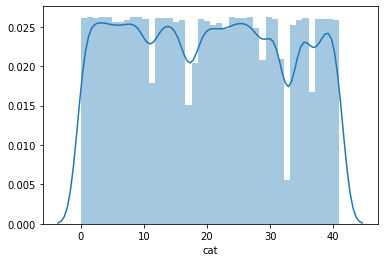

In [58]:
sns.distplot(df.cat, bins=42)

In [83]:
catg = df.groupby(['cat'])['cat']

cm =  catg.count().max()
rebalanced_series = catg.count()[catg.count()/cm<0.9]/cm
rebalanced_series

cat
11    0.681331
17    0.574122
18    0.777449
29    0.790388
32    0.797412
33    0.211830
37    0.637708
Name: cat, dtype: float64

In [109]:
idx = rebalanced_series.index
for a in idx:
    print(a, rebalanced_series[a], 1/rebalanced_series[a])
    
cm

11 0.6813308687615527 1.4677156809549647
17 0.5741219963031423 1.7417900837089504
18 0.777449168207024 1.2862577270565858
29 0.7903881700554528 1.2652011225444342
32 0.7974121996303142 1.2540565600370885
33 0.21182994454713494 4.720767888307155
37 0.6377079482439926 1.5681159420289856


2705

In [111]:
c_df = df[df['cat']=='33'].sample(2705, replace=True)
c_df

,filename,cat
68581,train/train/33/2e47bd5a79553e4bb507caa32a5d9b8...,33
68485,train/train/33/44e7d5626c6560931bce646d3246239...,33
68874,train/train/33/0d5bb97e9264832955a109b909c050c...,33
68664,train/train/33/0a28be47b9901a6c660edc0ea8bf67b...,33
68976,train/train/33/828b0e34b1cd204bcdb07c36f12d10d...,33
...,...,...
68759,train/train/33/05ac48e47f67e3ec8c52c28a122ee20...,33
68757,train/train/33/03f28750ff73a2086634bb33448cd48...,33
68974,train/train/33/93651fa0d5ff0df277bd22e85c4f387...,33
68792,train/train/33/599841b556e4922317faf2d1e5e04b1...,33


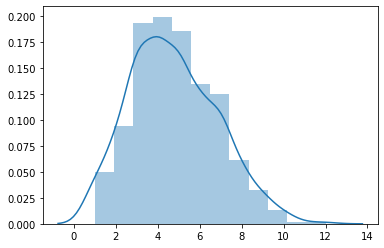

In [116]:
sns.distplot(c_df.groupby('filename').count(),bins=12)

6.555555555555555